In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import spectrogram
import soundfile as sf


In [3]:
# Load the audio file
audio_file = 'Recording.wav'
# sr set to none to extract sampling rate information from the audio file's metadata
waveform, sampling_rate = librosa.load(audio_file, sr=None) 
print(f'Sampling Rate: {sampling_rate} Hz')


Sampling Rate: 48000 Hz


In [4]:
from IPython.display import Audio

Audio(waveform, rate=sampling_rate)

In [5]:
sr = librosa.get_samplerate(audio_file)
sr

48000

In [6]:
waveform.shape

(286720,)

In [7]:
librosa.get_duration(y=waveform, sr=sampling_rate)

5.973333333333334

In [9]:
# Calculate amplitude
amp = np.max(waveform) - np.min(waveform)
amp

0.29214478

In [13]:
# Calculate beat depth
audiodata, sr = sf.read(audio_file)
bit_depth = audiodata.dtype.itemsize
print(f"Bit Depth is: {bit_depth} beats")

Bit Depth is: 8 beats


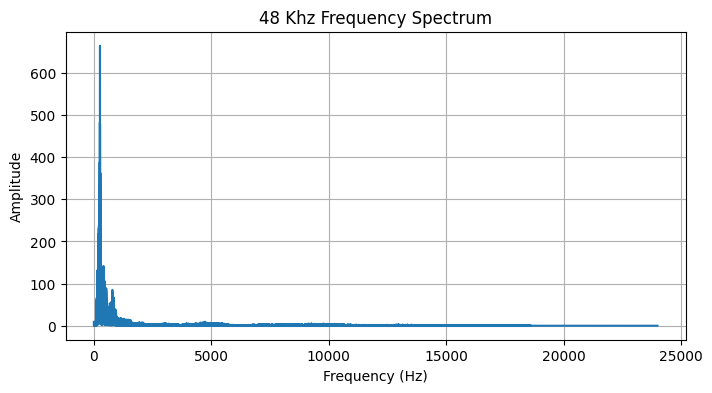

In [20]:
# Compute the FFT of the waveform
spectrum = fft(waveform)

# Frequency bins
frequencies = np.fft.fftfreq(len(spectrum), 1 / sampling_rate)

# Plot the frequency spectrum
plt.figure(figsize=(8, 4))
plt.plot(frequencies[:len(frequencies)//2], np.abs(spectrum[:len(spectrum)//2]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('48 Khz Frequency Spectrum')
plt.grid(True)
plt.show()

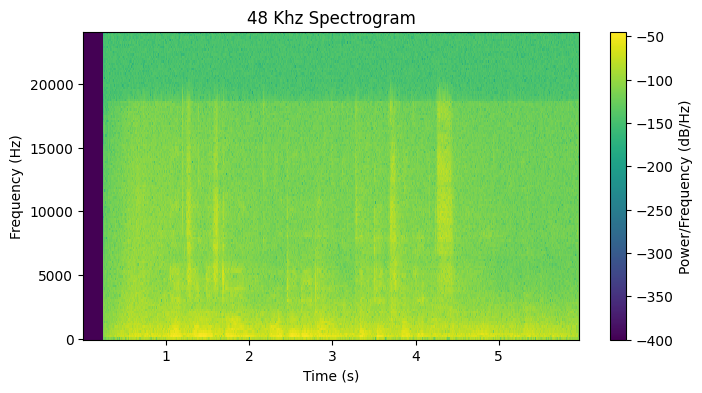

In [19]:
# Compute the spectrogram

# Small constant to avoid division by zero(if any)
epsilon = 1e-40  
f, t, Sxx = spectrogram(waveform, fs=sampling_rate)

# Plot the spectrogram with the constant added to Sxx
plt.figure(figsize=(8, 4))
plt.pcolormesh(t, f, 10 * np.log10(Sxx + epsilon))
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('48 Khz Spectrogram')
plt.show()


In [16]:
# resample to 16000 khz
y_16k = librosa.resample(waveform, orig_sr=sampling_rate, target_sr= 16000)
y_16k.shape

(95574,)

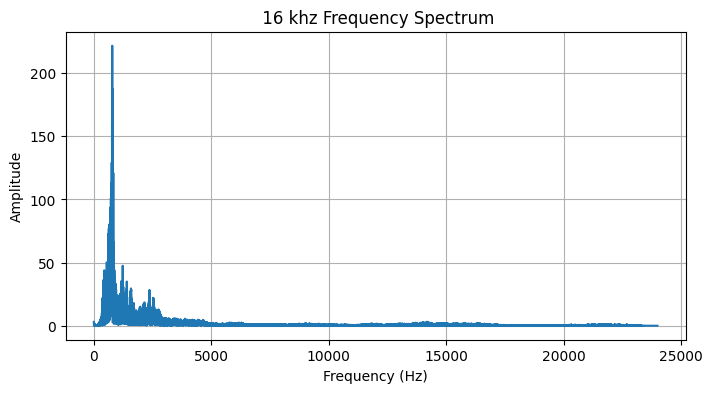

In [18]:
# Compute the FFT of the waveform
spectrum = fft(y_16k)

# Frequency bins
frequencies = np.fft.fftfreq(len(spectrum), 1 / sampling_rate)

# Plot the frequency spectrum
plt.figure(figsize=(8, 4))
plt.plot(frequencies[:len(frequencies)//2], np.abs(spectrum[:len(spectrum)//2]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title(' 16 khz Frequency Spectrum')
plt.grid(True)
plt.show()